# Алгоритм KNN 
Алгоритм **k-ближайших** соседей  Есть исходные объекты, для которых мы значем классы. Есть объекты, которые мы хотим классифицировать (предсказать для них классы).  

Метод основывается на поиске ближайших для объектов из обучающей выборки. Если объект похож на какое-то количество других, то у него такой же класс. Количество ближайших - гиперпараметр нашего алгоритма. Его можно перебирать, чтобы достичь какого-то качества. В зависимости от данных этот параметр может меняться, поэтому его надо подбирать. 

Для двумерного случая (когда есть два признака) видно как меняется разделяющая поверность при изменении этого параметра.
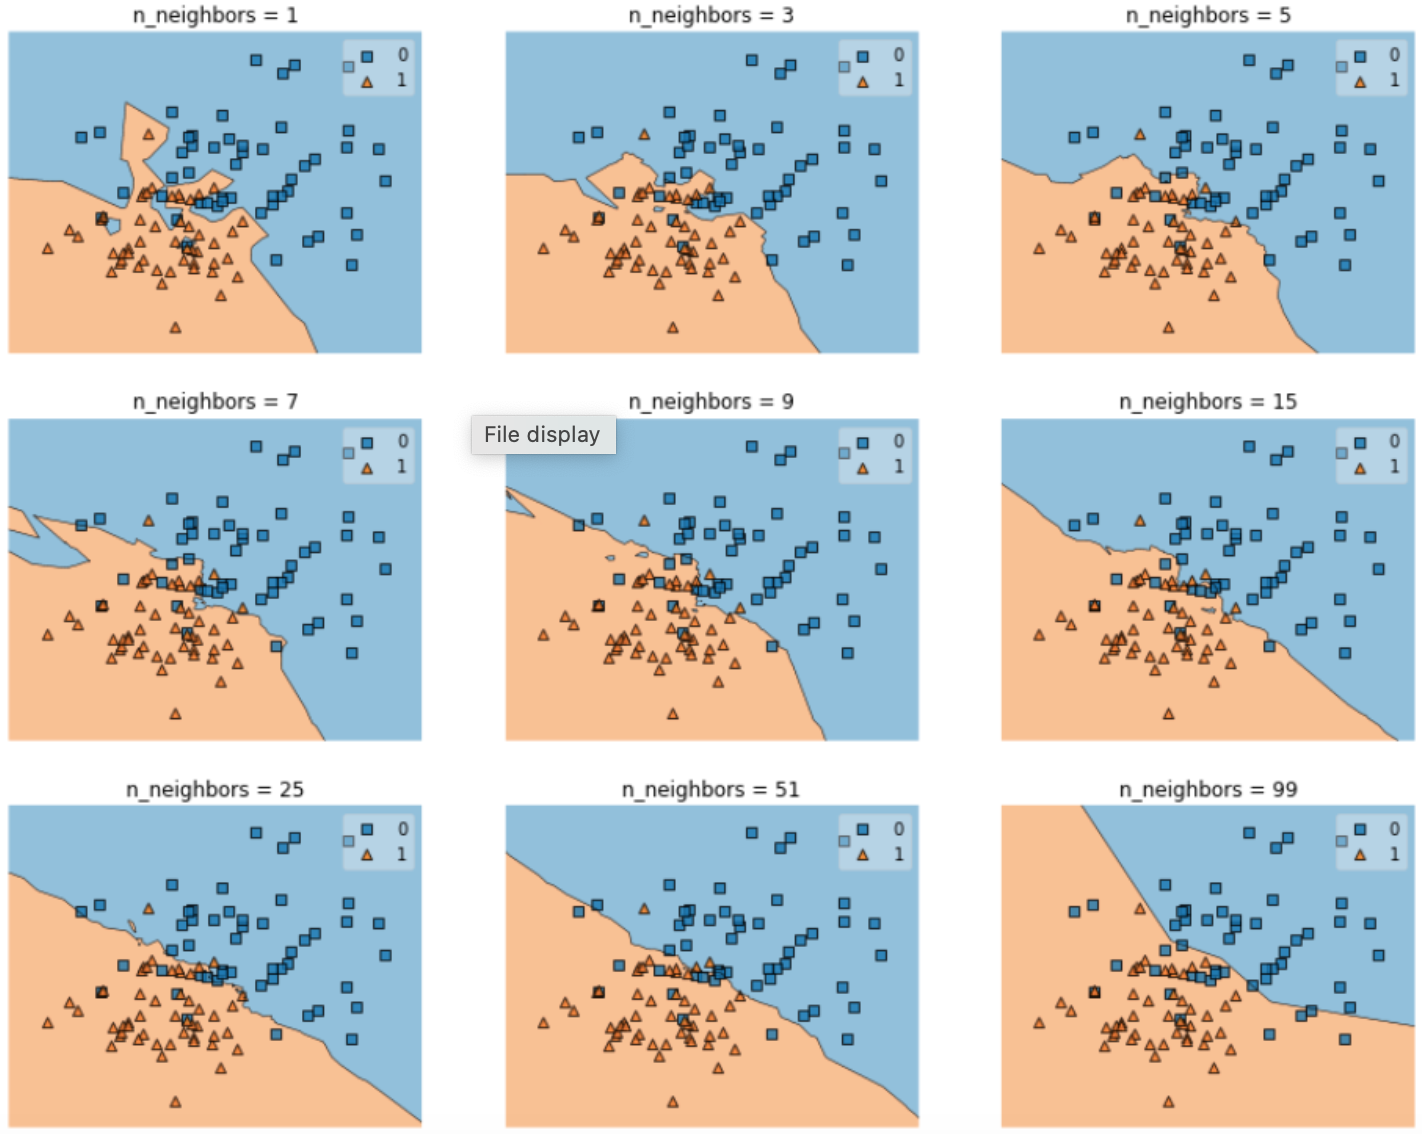

In [16]:
import numpy as np
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

Датасет по больным раком содержит пример бинарной классификации. 

In [3]:
data = load_breast_cancer()

**data** (переменная Х) - признаки. Есть 569 объектов, и для каждого объекта 30 численных признаков.

In [4]:
data['data'].shape

(569, 30)

**target** (переменная У) - показатель того, болен человек или нет. 

In [27]:
data['target'].shape

(569,)

In [5]:
X, y = data['data'], data['target']

In [6]:
from sklearn.model_selection import train_test_split

Делим выборку на обучающую и тестовую случайным образом, на выходе получаем split для Х и у. Берем 1/4 выборки как тестовую.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [8]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [9]:
from sklearn.neighbors import KNeighborsClassifier

Смотрим дефолтные аргументы функции KNeighborsClassifier, только меняем количество k-ближайших соседей на 3.

In [10]:
model = KNeighborsClassifier(n_neighbors=3)

Все модели в sklearn имеют достаточно простой интерфейс:
- **fit** - обучает алгоритм или модель
- **predict** - предсказывает классы 

In [11]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
preds = model.predict(X_test)
preds

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1])

Можно попросить выдавать не классы, а вероятности. Для 143 объектов модель выдает 2 класса - 0 и 1. 

In [13]:
model.predict_proba(X_test).shape

(143, 2)

In [14]:
model.predict_proba(X_test)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.

Смотрим на качество модели по метрике F1. В итоге получилось высокое качество модели. 

In [17]:
metrics.f1_score(y_test, preds)

np.float64(0.9430051813471503)

# Реализация классификатора 
Есть метод fit и predict. При создании объекта (**init**) берем целочисленное количество k-ближайших соседей, равное 3. 

Обычный KNN по-сути никак не обучается (**fit**). На этом этапе мы запоминаем массивы X_train и y_train.

В предсказании (**predict**) надо посчитать для каждого объекта в test расстояние до объекта в train. Это базовый вариант (Bruteforce) - перебор всех вариантов. 

## Евклидово расстояние
Есть  переменные X и y, две координаты (x0, y0) и (x1, x1). **Евклидово расстояние** - квадрат из суммы квадратов разниц между координатами.

In [ ]:
np.sqrt((x0 - x1) ** 2 + (y0 - y1) ** 2)

В **многомерном** пространстве евклидово расстояние находится проще - разница между X и y. Вычитание происходит поэллементно и в результате получается вектор размерностью 30 (как и количество признаков). Возведение вектора в квадрат также происходит поэлементно, далее от него берется сумма и корень. 

In [ ]:
np.sqrt(((x - y) ** 2).sum()) 

После того, как получили расстояние между test и train, надо найти k-ближайших. Метод **argsort** выдает индексы, а не сразу отсортированные дистанции - то, что нам нужно. В результате получили наиболее ближайшие для нашего объекта классы доругих объектов.

Чтобы классифицировать полученные значения, мы их усредняем. 

In [54]:
class KNN:
    def __init__(self, k: int = 3):
        self.k = k
    
    def fit(self, X_train: np.ndarray, y_train: np.ndarray): # считаем обычное евклидово расстояние, принимаем два вектора и возвращаем так же вектор 
        self.X_train = X_train
        self.y_train = y_train

    def euc_distance(self, x: np.ndarray, y: np.ndarray) -> np.ndarray: 
        return np.sqrt(((x - y) ** 2).sum()) 
    
    def predict(self, X_test: np.ndarray) -> np.ndarray:
        distances = np.zeros((X_test.shape[0], self.X_train.shape[0])) # записываем матрицу расстояний - (кол-во объектов в test, кол-во объектов в train) и инициализируем ее 0 
        for i in range(len(X_test)):  # вложенным циклом пройдемся с квадратичной сложностью - Bruteforce с двойным массивом 
            for j in range(len(self.X_train)):
                distances[i, j] = self.euc_distance(X_test[i], self.X_train[j]) # расстояние (i, j) - i-й объект из test, j-й объект из train 
 # для каждого вектора в test считаем расстояние для объекта в train
                
        ids = distances.argsort(axis=1)[:, :self.k] # сортируем матрицу дистанций по объектам - для каждого объекта X_test вначале получим ближайшие и берем первые 3 
        # передаем значения y из обучающей выборки как маску и получаем значения k-ближайших
        return (self.y_train[ids].mean(axis=1) >= 0.5).astype(int) # усредняем значения классификации и берем целоцисленные метки класса  

In [21]:
knn = KNN()
knn.fit(X_train, y_train)
knn.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1])

Смотрим результат по метрике F1 - получилось то же самое. 

In [22]:
metrics.f1_score(y_test, knn.predict(X_test))

np.float64(0.9430051813471503)

В зависимости от задачи не всегда считают евклидово расстояние. Например, если в задаче есть определенные объекты и хорошо работает определенное расстояние между ними. 

## Манхэттанское расстояние
Расстояние между двумя точками равно сумме модулей разностей их координат.

In [55]:
class KNN:
    def __init__(self, k: int = 3):
        self.k = k

    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        self.X_train = X_train
        self.y_train = y_train

    def manhattan_distance(self, x: np.ndarray, y: np.ndarray) -> float:
        return np.abs(x - y).sum() # манхэттанское расстояние

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        distances = np.zeros((X_test.shape[0], self.X_train.shape[0]))
        for i in range(len(X_test)):
            for j in range(len(self.X_train)):
                distances[i, j] = self.manhattan_distance(X_test[i], self.X_train[j])

        ids = distances.argsort(axis=1)[:, :self.k]
        return (self.y_train[ids].mean(axis=1) >= 0.5).astype(int)

In [29]:
knn_manhattan = KNN(k=3)
knn_manhattan.fit(X_train, y_train)
print("Manhattan:", knn_manhattan.predict(X_test))

Manhattan: [1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1
 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1]


In [30]:
metrics.f1_score(y_test, knn_manhattan.predict(X_test))

np.float64(0.9430051813471503)

## Косинусное расстояние
Метрика, которая измеряет угол между двумя векторами в пространстве.

In [31]:
import numpy as np

class KNN:
    def __init__(self, k: int = 3):
        self.k = k

    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        self.X_train = X_train
        self.y_train = y_train

    def cosine_distance(self, x: np.ndarray, y: np.ndarray) -> float:
        dot_product = np.dot(x, y) # косинусное расстояние 
        norm_x = np.linalg.norm(x)
        norm_y = np.linalg.norm(y)
        return 1 - dot_product / (norm_x * norm_y) 

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        distances = np.zeros((X_test.shape[0], self.X_train.shape[0]))
        for i in range(len(X_test)):
            for j in range(len(self.X_train)):
                distances[i, j] = self.cosine_distance(X_test[i], self.X_train[j])

        ids = distances.argsort(axis=1)[:, :self.k]
        return (self.y_train[ids].mean(axis=1) >= 0.5).astype(int)

In [32]:
knn_cosine = KNN(k=3)
knn_cosine.fit(X_train, y_train)
print("Cosine:", knn_cosine.predict(X_test))

Cosine: [1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1
 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0
 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1]


In [33]:
metrics.f1_score(y_test, knn_cosine.predict(X_test))

np.float64(0.9489795918367347)

**Вывод:** значение метрики F1 для модели, где поиск k-ближайших соседей осуществляется по косиносному расстоянию выше, чем по манхеттанскому расстоянию.

# Совместная реализация трех расстояний 
Алгоритм поиска k-ближайших соседей с возможностью выбора одной из трех метрик расстояния: евклидова, манхэттанского или косинусного.

In [56]:
class KNN:
    def __init__(self, k: int = 3, metric: str = 'euclidean'):
        self.k = k
        self.metric = metric.lower()

    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        self.X_train = X_train
        self.y_train = y_train

    def euc_distance(self, x: np.ndarray, y: np.ndarray) -> float:
        return np.sqrt(((x - y) ** 2).sum()) # евклидово расстояние

    def manhattan_distance(self, x: np.ndarray, y: np.ndarray) -> float:
        return np.abs(x - y).sum() # манхэттанское расстояние

    def cosine_distance(self, x: np.ndarray, y: np.ndarray) -> float:
        dot_product = np.dot(x, y) # косинусное расстояние
        norm_x = np.linalg.norm(x)
        norm_y = np.linalg.norm(y)
        return 1 - dot_product / (norm_x * norm_y)

    def compute_distance(self, x: np.ndarray, y: np.ndarray) -> float:
        if self.metric == 'euclidean':
            return self.euc_distance(x, y)
        elif self.metric == 'manhattan':
            return self.manhattan_distance(x, y)
        elif self.metric == 'cosine':
            return self.cosine_distance(x, y)
        else:
            raise ValueError("Unsupported distance metric")

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        distances = np.zeros((X_test.shape[0], self.X_train.shape[0]))
        for i in range(len(X_test)):
            for j in range(len(self.X_train)):
                distances[i, j] = self.compute_distance(X_test[i], self.X_train[j])

        ids = distances.argsort(axis=1)[:, :self.k]
        return (self.y_train[ids].mean(axis=1) >= 0.5).astype(int)

## Евклидово расстояние

In [48]:
knn_euclidean = KNN(k=3, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
print("Euclidean:", knn_euclidean.predict(X_test))

Euclidean: [1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1
 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1
 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1]


## Манхэттанское расстояние

In [49]:
knn_manhattan = KNN(k=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
print("Manhattan:", knn_manhattan.predict(X_test))

Manhattan: [1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1
 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1]


## Косинусное расстояние 

In [50]:
knn_cosine = KNN(k=3, metric='cosine')
knn_cosine.fit(X_train, y_train)
print("Cosine:", knn_cosine.predict(X_test))

Cosine: [1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1
 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0
 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1]


In [51]:
print("Euclidean F1-Score:", metrics.f1_score(y_test, knn_euclidean.predict(X_test)))
print("Manhattan F1-Score:", metrics.f1_score(y_test, knn_manhattan.predict(X_test)))
print("Cosine F1-Score:", metrics.f1_score(y_test, knn_cosine.predict(X_test)))

Euclidean F1-Score: 0.9430051813471503
Manhattan F1-Score: 0.9430051813471503
Cosine F1-Score: 0.9489795918367347


**Вывод:** значение метрики F1 для модели, где поиск k-ближайших соседей осуществляется по евклидову и по манхеттанскому расстоянию одинаковое, по косиносному расстоянию немного выше. 

Если увеличить количество k-ближайших соседей до **10**, различия в значениях метрики F1 станут более заметны. Наибольшее значение метрики F1 будет для манхэттанского расстояния, наименьшее - для евклидова расстояния. 

In [61]:
knn_euclidean = KNN(k=10, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
print("Euclidean:", knn_euclidean.predict(X_test))

knn_manhattan = KNN(k=10, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
print("Manhattan:", knn_manhattan.predict(X_test))

knn_cosine = KNN(k=10, metric='cosine')
knn_cosine.fit(X_train, y_train)
print("Cosine:", knn_cosine.predict(X_test))

Euclidean: [1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1
 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1]
Manhattan: [1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1
 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1]
Cosine: [1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1
 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0
 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1]


In [62]:
print("Euclidean F1-Score:", metrics.f1_score(y_test, knn_euclidean.predict(X_test)))
print("Manhattan F1-Score:", metrics.f1_score(y_test, knn_manhattan.predict(X_test)))
print("Cosine F1-Score:", metrics.f1_score(y_test, knn_cosine.predict(X_test)))

Euclidean F1-Score: 0.9533678756476683
Manhattan F1-Score: 0.9641025641025641
Cosine F1-Score: 0.9543147208121827


Можно проверить другие метрики задачи классификации: Accuracy, Precision, Recall, ROC-AUC.
### Accuracy
Количество правильно угаданных объектов. Может быть расчитано по формуле или вручную.
Точность модели, где поиск k-ближайших соседей осуществляется по манхэттанскому расстоянию, наибольшая, по евклидову и косиносному - наименьшая. 

In [79]:
y_pred_euclidean = knn_euclidean.predict(X_test)
print("Euclidean Accuracy:", '\n', metrics.accuracy_score(y_test, knn_euclidean.predict(X_test)), '\n', (y_test == knn_euclidean.predict(X_test)).mean())

Euclidean Accuracy: 
 0.9370629370629371 
 0.9370629370629371


In [80]:
y_pred_manhattan = knn_manhattan.predict(X_test)
print("Manhattan Accuracy:", '\n', metrics.accuracy_score(y_test, y_pred_manhattan), '\n', (y_test == y_pred_manhattan).mean())

Manhattan Accuracy: 
 0.951048951048951 
 0.951048951048951


In [81]:
y_pred_cosine = knn_cosine.predict(X_test)
print("Cosine Accuracy:", '\n', metrics.accuracy_score(y_test, y_pred_cosine), '\n', (y_test == y_pred_cosine).mean())

Cosine Accuracy: 
 0.9370629370629371 
 0.9370629370629371


### Precision
Отношение правильно угаданных моделью объектов ко всем объектам, к которым модель выдала 1. Точность модели, где поиск k-ближайших соседей осуществляется по манхэттанскому расстоянию, наибольшая, по косиносному - наименьшая.

In [88]:
tp_e = ((y_test == 1) & (y_pred_euclidean == 1)).sum() # true positive
fp_e = ((y_test == 0) & (y_pred_euclidean == 1)).sum() # false positive
fn_e = y_test.sum() # false negative

print("Euclidean Precision:", '\n', metrics.precision_score(y_test, y_pred_euclidean), '\n', (tp_e / (tp_e + fp_e)))

Euclidean Precision: 
 0.9387755102040817 
 0.9387755102040817


In [90]:
tp_m = ((y_test == 1) & (y_pred_manhattan == 1)).sum() 
fp_m = ((y_test == 0) & (y_pred_manhattan == 1)).sum() 
fn_m = y_test.sum()

print("Manhattan Precision:", '\n', metrics.precision_score(y_test, y_pred_manhattan), '\n', (tp_m / (tp_m + fp_m)))

Manhattan Precision: 
 0.94 
 0.94


In [91]:
tp_c = ((y_test == 1) & (y_pred_cosine == 1)).sum() 
fp_c = ((y_test == 0) & (y_pred_cosine == 1)).sum() 
fn_c = y_test.sum()

print("Cosine Precision:", '\n', metrics.precision_score(y_test, y_pred_cosine), '\n', (tp_c / (tp_c + fp_c)))

Cosine Precision: 
 0.9215686274509803 
 0.9215686274509803


### Recall
количество правильно найденных объектов из всех положительных. Полнота модели, где поиск k-ближайших соседей осуществляется по манхэттанскому и косиносному расстоянию, наибольшая, по евклидову - наименьшая.

In [95]:
print("Euclidean Recall:", '\n', metrics.recall_score(y_test, y_pred_euclidean), '\n', (tp_e / fn_e))

Euclidean Recall: 
 0.968421052631579 
 0.968421052631579


In [96]:
print("Manhattan Recall:", '\n', metrics.recall_score(y_test, y_pred_manhattan), '\n', (tp_m / fn_m))

Manhattan Recall: 
 0.9894736842105263 
 0.9894736842105263


In [97]:
print("Cosine Recall:", '\n', metrics.recall_score(y_test, y_pred_cosine), '\n', (tp_c / fn_c))

Cosine Recall: 
 0.9894736842105263 
 0.9894736842105263


### ROC-AUC
Площадь под ROC-кривой. Полученные значения ROC-AUC лежат в оптимальном диапазоне от 0,5 до 1 и близки к идеальном классификатору. Значение метрики ROC-AUC для модели, где поиск k-ближайших соседей осуществляется по манхэттанскому расстоянию, наибольшая, по косиносному - наименьшая. В

In [98]:
print("Euclidean ROC-AUC:", '\n', metrics.roc_auc_score(y_test, y_pred_euclidean))

Euclidean ROC-AUC: 
 0.9217105263157894


In [99]:
print("Manhattan ROC-AUC:", '\n', metrics.roc_auc_score(y_test, y_pred_manhattan))

Manhattan ROC-AUC: 
 0.9322368421052631


In [100]:
print("Cosine ROC-AUC:", '\n', metrics.roc_auc_score(y_test, y_pred_cosine))

Cosine ROC-AUC: 
 0.9114035087719299


# Оптимизация алгоритма
Иногда бывает важна стандартизация признаков. **StandardScaler** делает так, чтобы распределение выборки имело среднее в 0 и единичное стандартное отклонение.

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
class KNN:
    def __init__(self, k: int = 3, metric: str = 'euclidean'):
        self.k = k
        self.metric = metric.lower()
        self.scaler = StandardScaler()  # создаем sсaler относительно нашей модели 
    
    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        self.scaler.fit(X_train) # делаем fit для scaler на train
        self.X_train = self.scaler.fit_transform(X_train)  # запомненный X_train берем трансформированный из входных данных 
        self.y_train = y_train # делаем fit для scaler на train
    
    def euc_distance(self, x: np.ndarray, y: np.ndarray) -> float:
        return np.sqrt(((x - y) ** 2).sum()) 

    def manhattan_distance(self, x: np.ndarray, y: np.ndarray) -> float:
        return np.abs(x - y).sum() 

    def cosine_distance(self, x: np.ndarray, y: np.ndarray) -> float:
        dot_product = np.dot(x, y) 
        norm_x = np.linalg.norm(x)
        norm_y = np.linalg.norm(y)
        return 1 - dot_product / (norm_x * norm_y)

    def compute_distance(self, x: np.ndarray, y: np.ndarray) -> float:
        if self.metric == 'euclidean':
            return self.euc_distance(x, y)
        elif self.metric == 'manhattan':
            return self.manhattan_distance(x, y)
        elif self.metric == 'cosine':
            return self.cosine_distance(x, y)
        else:
            raise ValueError("Unsupported distance metric")

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        X_test = self.scaler.transform(X_test)  # test трансформируем под это же запомненное распределение 
        distances = np.zeros((X_test.shape[0], self.X_train.shape[0]))
        for i in range(len(X_test)):
            for j in range(len(self.X_train)):
                distances[i, j] = self.compute_distance(X_test[i], self.X_train[j])

        ids = distances.argsort(axis=1)[:, :self.k]
        return (self.y_train[ids].mean(axis=1) >= 0.5).astype(int)


In [103]:
knn_euclidean = KNN(k=3, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
print("Euclidean:", knn_euclidean.predict(X_test))

knn_manhattan = KNN(k=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
print("Manhattan:", knn_manhattan.predict(X_test))

knn_cosine = KNN(k=3, metric='cosine')
knn_cosine.fit(X_train, y_train)
print("Cosine:", knn_cosine.predict(X_test))

Euclidean: [1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0
 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1]
Manhattan: [1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1]
Cosine: [1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0
 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1]


In [104]:
print("Euclidean F1-Score:", metrics.f1_score(y_test, knn_euclidean.predict(X_test)))
print("Manhattan F1-Score:", metrics.f1_score(y_test, knn_manhattan.predict(X_test)))
print("Cosine F1-Score:", metrics.f1_score(y_test, knn_cosine.predict(X_test)))

Euclidean F1-Score: 0.9637305699481865
Manhattan F1-Score: 0.9791666666666666
Cosine F1-Score: 0.96875


**Вывод:** в результате оптимизации получаем качество модели немного выше.